In [1]:
import numpy as np
import os

# Import visualization stuff
import matplotlib.pyplot as plt
import nibabel as nib
from nilearn import plotting
from brainspace.plotting import plot_hemispheres
from brainspace.mesh.mesh_io import read_surface, write_surface

# Load helper functions
from dataloader import set_paths, copy_files
%load_ext autoreload
%autoreload 2

In [2]:
# Initialize parameters
params = {}
params['subjID'] = 'JC'
# params['dtype'] = ctypes.c_int16

p = set_paths(params)
copy_files(p, params)

Subject folder already exists


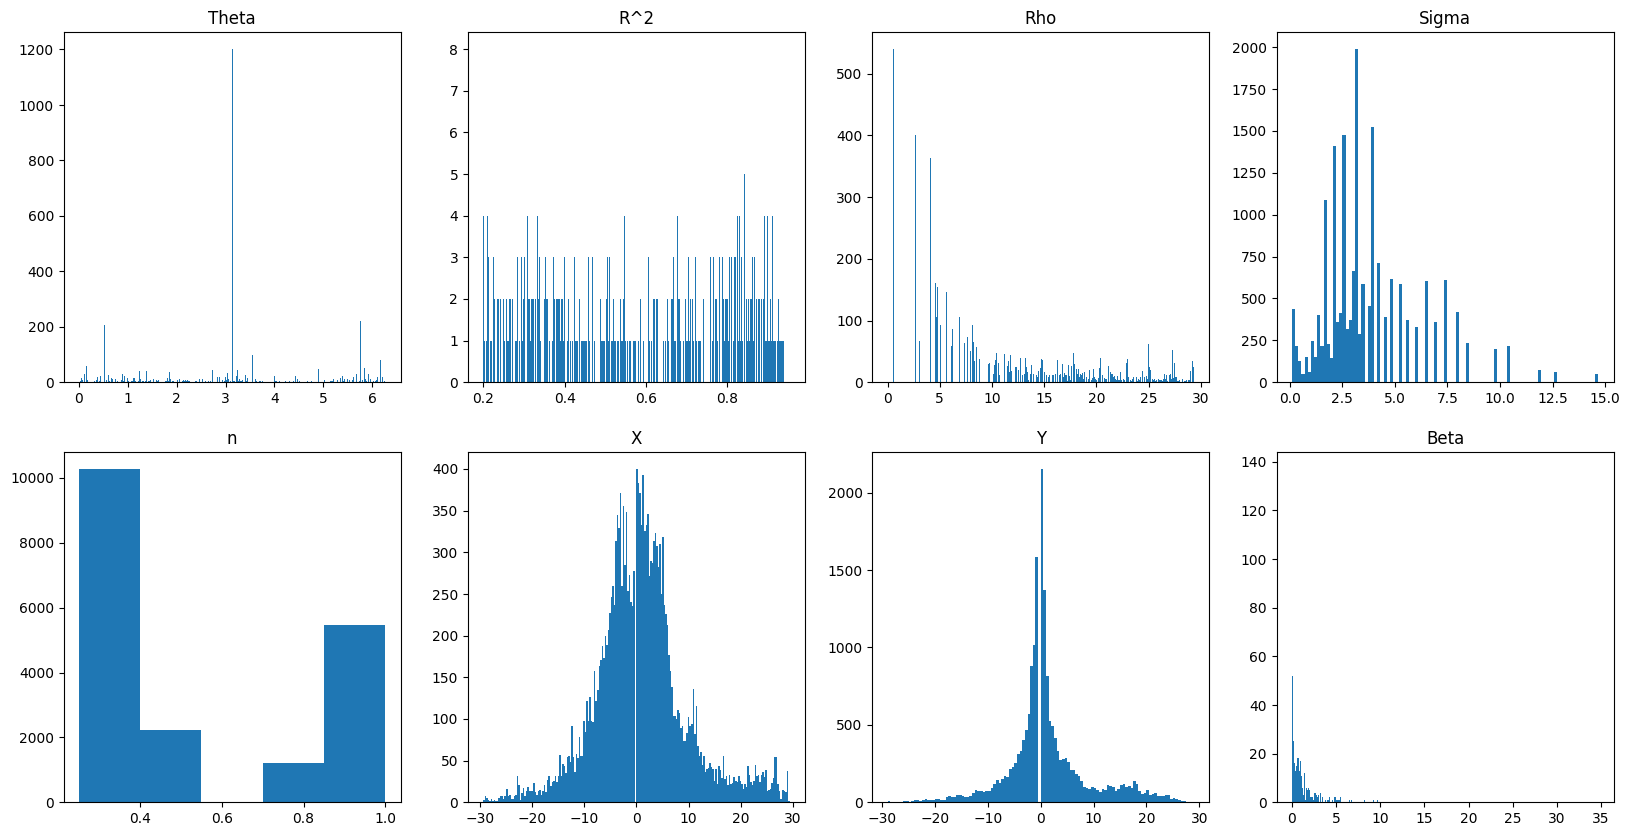

In [3]:
true_fit_path = os.path.join(p['pRF_data'], 'JC/mrVistaFit/RF_ss5-gFit.nii.gz')
true_fit = nib.load(true_fit_path).get_fdata()

# Find voxels with R2 > 0.1
r2 = true_fit[:, :, :, 1]
r2_threshold = 0.2
r2_mask = r2 > r2_threshold

# Extract true values
theta_true = true_fit[:, :, :, 0]
theta_true = theta_true[r2_mask].flatten()
rsquared_true = true_fit[:, :, :, 1]
rsquared_true = rsquared_true[r2_mask].flatten()
rho_true = true_fit[:, :, :, 2]
rho_true = rho_true[r2_mask].flatten()
sigma_true = true_fit[:, :, :, 3]
sigma_true = sigma_true[r2_mask].flatten()
exp_true = true_fit[:, :, :, 4]
exp_true = exp_true[r2_mask].flatten()
x_true = true_fit[:, :, :, 5]
x_true = x_true[r2_mask].flatten()
y_true = true_fit[:, :, :, 6]
y_true = y_true[r2_mask].flatten()
beta_true = true_fit[:, :, :, 7]
beta_true = beta_true[r2_mask].flatten()

bin_vals = [2486, 19182, 847, 96, 4, 201, 115, 19186]
#Theta: 2486 Range: 0.0 - 6.265691757202148
#R^2: 19182 Range: 0.20000019669532776 - 0.9530436396598816
#Rho: 847 Range: 0.0 - 29.350000381469727
#Sigma: 96 Range: 0.10000000149011612 - 14.675000190734863
#n: 4 Range: 0.25 - 1.0
#X: 201 Range: -29.350000381469727 - 29.350000381469727
#Y: 115 Range: -28.976343154907227 - 28.976343154907227
#Beta: 19186 Range: 0.008104726672172546 - 34.680965423583984

# rho_true = true_fit[:, :, :, 2].flatten()
# sigma_true = true_fit[:, :, :, 3].flatten()
# x_true = true_fit[:, :, :, 4].flatten()
# y_true = true_fit[:, :, :, 5].flatten()
# beta_true = true_fit[:, :, :, 6].flatten()

f, axs = plt.subplots(2, 4, figsize=(20, 10))
axs = axs.flatten()
for i, (name, true_value) in enumerate(zip(['Theta', 'R^2', 'Rho', 'Sigma', 'n', 'X', 'Y', 'Beta'], 
                                           [theta_true, rsquared_true, rho_true, sigma_true, exp_true, x_true, y_true, beta_true])):
    axs[i].hist(true_value, bins=bin_vals[i]+1)
    axs[i].set_title(name)
plt.show()

In [4]:
print('#Theta: ' + str(len(np.unique(theta_true))) + ' Range: ' + str(np.min(theta_true)) + ' - ' + str(np.max(theta_true)))
print('#R^2: ' + str(len(np.unique(rsquared_true))) + ' Range: ' + str(np.min(rsquared_true)) + ' - ' + str(np.max(rsquared_true)))
print('#Rho: ' + str(len(np.unique(rho_true))) + ' Range: ' + str(np.min(rho_true)) + ' - ' + str(np.max(rho_true)))
print('#Sigma: ' + str(len(np.unique(sigma_true)))  + ' Range: ' + str(np.min(sigma_true)) + ' - ' + str(np.max(sigma_true)))
print('#n: ' + str(len(np.unique(exp_true))) + ' Range: ' + str(np.min(exp_true)) + ' - ' + str(np.max(exp_true)))
print('#X: ' + str(len(np.unique(x_true))) + ' Range: ' + str(np.min(x_true)) + ' - ' + str(np.max(x_true)))
print('#Y: ' + str(len(np.unique(y_true))) + ' Range: ' + str(np.min(y_true)) + ' - ' + str(np.max(y_true)))
print('#Beta: ' + str(len(np.unique(beta_true))) + ' Range: ' + str(np.min(beta_true)) + ' - ' + str(np.max(beta_true)))

#Theta: 2486 Range: 0.0 - 6.265691757202148
#R^2: 19182 Range: 0.20000019669532776 - 0.9530436396598816
#Rho: 847 Range: 0.0 - 29.350000381469727
#Sigma: 96 Range: 0.10000000149011612 - 14.675000190734863
#n: 4 Range: 0.25 - 1.0
#X: 201 Range: -29.350000381469727 - 29.350000381469727
#Y: 115 Range: -28.976343154907227 - 28.976343154907227
#Beta: 19186 Range: 0.008104726672172546 - 34.680965423583984


In [8]:
print('Grid Sizes:')
print('Theta: Mean=' + str(np.mean(np.diff(np.unique(theta_true)))) + ' Max=' + str(np.max(np.diff(np.unique(theta_true)))))
print('R^2: Mean=' + str(np.mean(np.diff(np.unique(rsquared_true)))) + ' Max=' + str(np.max(np.diff(np.unique(rsquared_true)))))
print('Rho: Mean=' + str(np.mean(np.diff(np.unique(rho_true)))) + ' Max=' + str(np.max(np.diff(np.unique(rho_true)))))
print('Sigma: Mean=' + str(np.mean(np.diff(np.unique(sigma_true)))) + ' Max=' + str(np.max(np.diff(np.unique(sigma_true)))))
print('n: Mean=' + str(np.mean(np.diff(np.unique(exp_true)))) + ' Max=' + str(np.max(np.diff(np.unique(exp_true)))))
print('X: Mean=' + str(np.mean(np.diff(np.unique(x_true)))) + ' Max=' + str(np.max(np.diff(np.unique(x_true)))))
print('Y: Mean=' + str(np.mean(np.diff(np.unique(y_true)))) + ' Max=' + str(np.max(np.diff(np.unique(y_true)))))
print('Beta: Mean=' + str(np.mean(np.diff(np.unique(beta_true)))) + ' Max=' + str(np.max(np.diff(np.unique(beta_true)))))

Grid Sizes:
Theta: Mean=3.725290298461914e-09 Max=0.03886890411376953
R^2: Mean=1.4901161193847656e-08 Max=0.0018017292022705078
Rho: Mean=1.1920928955078125e-07 Max=0.5870000123977661
Sigma: Mean=0.001146554946899414 Max=1.9660778045654297
n: Mean=0.25 Max=0.25
X: Mean=0.2934989929199219 Max=0.2935009002685547
Y: Mean=0.5083560943603516 Max=0.5083580017089844
Beta: Mean=3.725290298461914e-09 Max=8.602375030517578


In [ ]:
# Visualize the surfaces for the subject
lh_surf_gii_path = os.path.join(p['pRF_data'], params['subjID'], params['subjID']+'anat', 'surf', 'lh.inflated.gii')
rh_surf_gii_path = os.path.join(p['pRF_data'], params['subjID'], params['subjID']+'anat', 'surf', 'rh.inflated.gii')
if not os.path.exists(lh_surf_gii_path):
    lh_surf_path = os.path.join(p['pRF_data'], params['subjID'], params['subjID']+'anat', 'surf', 'lh.inflated')
    rh_surf_path = os.path.join(p['pRF_data'], params['subjID'], params['subjID']+'anat', 'surf', 'rh.inflated')
    lh_surf = read_surface(lh_surf_path, itype='fs')
    rh_surf = read_surface(rh_surf_path, itype='fs')
    3
    nib.save(nib.gifti.gifti.GiftiImage(lh_surf), lh_surf_gii_path)
    nib.save(nib.gifti.gifti.GiftiImage(rh_surf), rh_surf_gii_path)
else:
    lh_surf_gii = nib.load(lh_surf_gii_path).get_data()
    rh_surf_gii = nib.load(rh_surf_gii_path).get_data()


# plot_hemispheres(lh_surf, rh_surf, embed_nb=True, zoom = 1.2, share='both', size=(900, 500), 
#                  cmap='viridis', interactive=False, color_bar='bottom')


# Create a visualization of BOLD over T1
# Load T1
t1 = nib.load(p['pRF_anat'])
t1_data = t1.get_fdata()
t1_affine = t1.affine
t1_header = t1.header

# Visuzalize T1
plotting.plot_anat(brainmask_data, title='T1', display_mode='ortho', draw_cross=False, annotate=False, cut_coords=(0, 0, 0))
plt.show()